# House Price Prediction

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

### Importing the dataset

In [2]:
from sklearn.datasets import load_boston
house_price_dataset = load_boston()
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
house_prices_df = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_prices_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### This dataset has not included the target column i.e. price column so we added the target

In [4]:
house_prices_df['Price'] = house_price_dataset.target

In [5]:
house_prices_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Checking the shape of the data

In [6]:
house_prices_df.shape

(506, 14)

#### Checking if there is null values

In [7]:
house_prices_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Info ad Describe

In [8]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
house_prices_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Understanding the correlation between various features in the dataset
1. Positive Correlation
2. Negative Correlation

In [10]:
correlation = house_prices_df.corr()

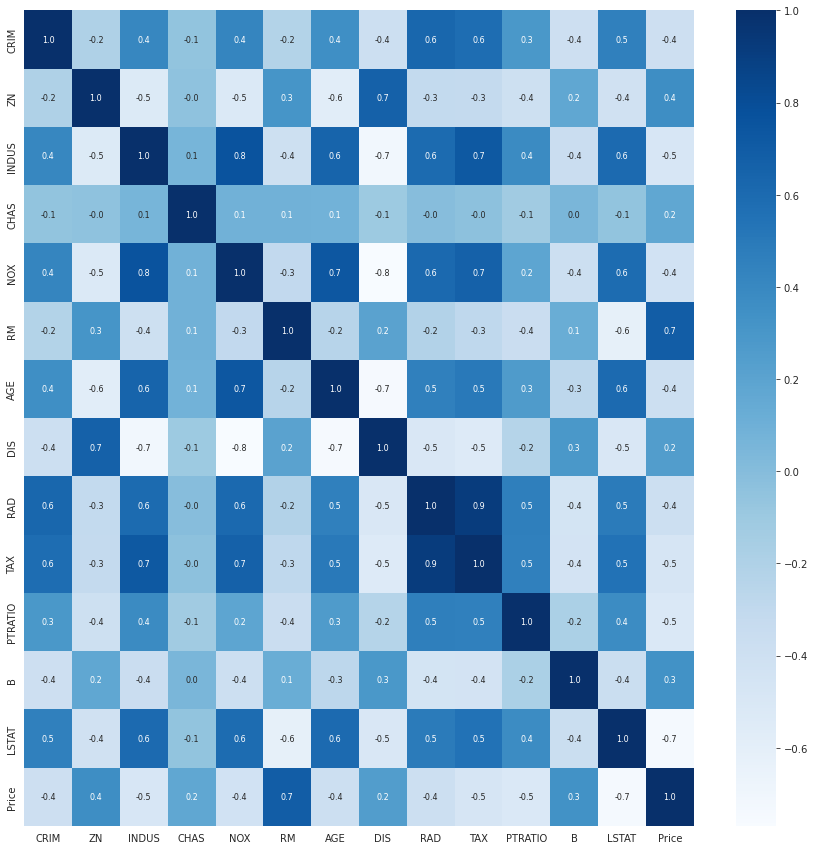

In [11]:
#### Constructing the heatmap to visualize correlation
plt.figure(figsize=(15, 15))

sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

### Splitting the data and the target

In [12]:
X = house_prices_df.drop('Price', axis=1)
y = house_prices_df['Price']

### Splitting the data into training and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train our model with training dataset

In [14]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [15]:
y_preds_test = model.predict(X_test)
y_preds_test

array([23.25328  , 30.024755 , 15.632249 , 23.313478 , 17.775118 ,
       21.142563 , 20.19583  , 15.010124 , 21.23614  , 22.242369 ,
       20.457346 , 19.209145 ,  8.551788 , 21.210636 , 20.696491 ,
       26.74365  , 18.824339 , 10.525872 , 45.68885  , 14.116162 ,
       26.618996 , 24.94542  , 13.3510275, 20.87231  , 15.400073 ,
       15.636547 , 22.324673 , 12.777009 , 20.726126 , 22.56401  ,
       20.346395 , 22.303246 , 18.523277 , 21.764612 , 15.568828 ,
       15.683646 , 33.073547 , 19.115112 , 21.955132 , 22.399914 ,
       18.998787 , 31.328337 , 43.464993 , 18.20766  , 22.09233  ,
       14.353467 , 14.607512 , 22.716745 , 19.700527 , 27.072327 ,
       22.579268 , 35.133675 , 16.241447 , 25.214682 , 46.013332 ,
       21.89786  , 15.043295 , 32.93268  , 20.53731  , 16.568089 ,
       24.07178  , 34.34796  , 28.542194 , 16.977676 , 25.867334 ,
       15.649837 , 13.039615 , 23.00082  , 27.26897  , 15.414835 ,
       21.546648 , 31.72919  , 10.665012 , 20.770847 , 21.8483

In [16]:
y_preds_train = model.predict(X_train)
y_preds_train

array([12.006792 , 19.914322 , 19.41386  , 13.41272  , 18.233686 ,
       24.599525 , 21.084385 , 24.691845 ,  8.696693 , 27.479736 ,
       20.694065 , 36.1663   , 31.603483 , 11.695366 , 39.791046 ,
       13.88976  , 21.810648 , 23.713993 , 17.597576 , 24.410297 ,
        8.793519 , 19.173897 , 25.288088 , 20.433308 , 23.098907 ,
       37.891342 , 15.598552 , 45.398563 , 15.698146 , 22.600924 ,
       14.546442 , 18.711456 , 17.798622 , 16.106794 , 20.609913 ,
       31.608261 , 29.09079  , 15.603799 , 17.517525 , 22.501944 ,
       19.392653 , 19.290897 ,  8.49561  , 20.603264 , 16.995317 ,
       17.08292  , 14.509991 , 49.995197 , 14.281856 , 12.59869  ,
       28.704367 , 21.207237 , 19.308727 , 23.09419  , 19.099642 ,
       25.001644 , 33.402706 ,  5.00865  , 29.600845 , 18.669462 ,
       21.661974 , 23.051264 , 22.805435 , 20.95566  , 48.781216 ,
       14.632303 , 16.598646 , 27.074171 , 20.081707 , 19.794664 ,
       21.010654 , 41.29935  , 23.153635 , 20.358414 , 18.5552

### Calculating the accuracy score

In [17]:
test_score = model.score(X_test, y_test)
test_score

0.9105388132305845

In [18]:
train_score = model.score(X_train, y_train)
train_score

0.9999953622164942

### Calculating the R-squared error

In [19]:
from sklearn.metrics import r2_score
Rsq_err_train = r2_score(y_train, y_preds_train)
print('The R-squared error on train data: ', Rsq_err_train)

Rsq_err_test = r2_score(y_test, y_preds_test)
print('The R-squared error on test data: ', Rsq_err_test)

The R-squared error on train data:  0.9999953622164942
The R-squared error on test data:  0.9105388132305845


### Mean Absolute Error

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_err_train = mean_absolute_error(y_train, y_preds_train)
print('The Mean Absolute Error on train data: ', mean_absolute_err_train)

mean_absolute_err_test = mean_absolute_error(y_test, y_preds_test)
print('The Mean Absolute Error on test data: ', mean_absolute_err_test)

The Mean Absolute Error on train data:  0.013965251658222466
The Mean Absolute Error on test data:  1.9574996602301502


### Visualizing the actual price and predicted price in training data

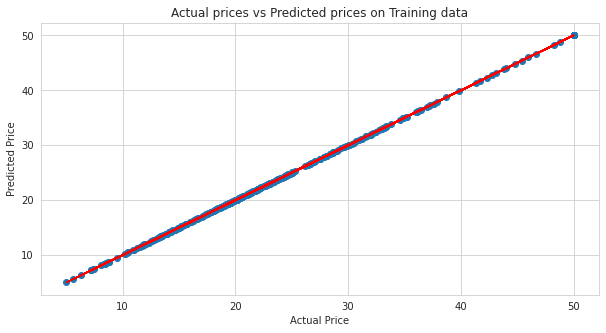

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_preds_train)
plt.plot(y_train, y_preds_train, color='red')
plt.title('Actual prices vs Predicted prices on Training data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Visualizing the actual price and predicted price in test data

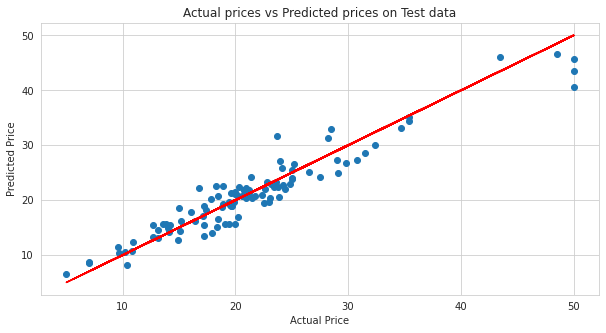

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_preds_test)
plt.plot(y_train, y_preds_train, color='red')
plt.title('Actual prices vs Predicted prices on Test data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Now let's fit the other model (like linear regressor, random forest regressor, decision tree regressor, support vector regressor) into the training data 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [24]:
## Let's define a function fit_model

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### Linear Regression

In [25]:
fit_model(LinearRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20

### Decision Tree Regressor

In [26]:
fit_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [25.  33.1 17.3 21.7 23.2 18.5 16.6 16.7 23.  22.  27.1 18.3  7.4 20.5
 18.5 25.  20.5 10.5 44.  13.  23.1 24.4 13.6 22.  13.5 13.5 21.2 14.6
 19.4 20.8 27.1 23.1 10.4 16.2 13.3 15.6 33.  18.5 20.4 24.6 19.8 30.1
 44.  16.1 22.  17.1 14.3 24.1 17.5 33.1 20.1 34.9 16.7 30.1 43.1 19.5
 15.2 22.8 22.  22.5 24.5 33.  29.4 16.1 26.6 14.4 15.4 23.2 22.8 14.1
 21.8 28.7  8.3 18.6 21.5 10.5 19.8 50.  13.3  8.1 21.2 16.3 19.4 10.5
 14.5 28.4 13.9 23.  23.2 18.  22.9  8.8 18.4 17.6 16.2 18.4 50.  16.3
 11.7 16.3 19.  25. ]

The accuracy score:  0.8602455096610764


### Random Forest Regressor

In [27]:
fit_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [22.887 31.056 16.976 23.84  16.583 21.64  18.941 15.337 21.223 20.934
 20.229 19.941  8.688 21.697 19.457 25.49  19.065  8.234 45.223 14.708
 24.121 23.996 14.604 23.618 15.029 14.878 21.51  13.997 19.152 21.396
 19.484 23.101 30.568 20.439 14.681 15.754 35.033 19.137 20.664 24.406
 19.059 29.469 45.05  19.439 22.528 13.565 15.194 24.64  18.251 29.327
 21.102 33.918 16.349 25.994 44.88  22.084 15.53  31.432 22.17  20.856
 25.14  34.145 30.029 18.664 26.888 17.25  13.403 22.971 28.674 15.943
 20.598 28.708 10.586 22.042 22.123  6.95  20.049 45.31  10.989 12.618
 21.512 11.971 19.713  9.269 20.389 26.872 15.456 23.187 23.723 18.139
 21.509  8.108 19.44  18.966 21.862 19.944 40.014 11.45  12.524 12.673
 19.899 23.535]

The accuracy score:  0.8735923249841657


### Support Vector Regressor

In [28]:
fit_model(SVR(kernel='linear'), X_train, X_test, y_train, y_test)

The predicted values:
  [26.11273    32.55199607 15.52297042 24.14099186 18.49975564 21.22914895
 17.47848116 16.37591772 19.45212656 20.16923572 21.01887497 18.04291114
 -7.38338071 20.88612924 17.66440917 25.25240119 19.4272031   4.85827651
 40.08122346 17.03587103 26.82848503 28.84711728 12.06985521 24.91201353
 16.48813793 12.26294285 21.18954535 14.36039322 18.94136369 18.8399622
 19.14699323 24.55659613 25.01836886 15.48548282 14.64865307 17.9905302
 30.44823793 20.03974452 21.21029224 24.37583928 14.1052248  30.02494423
 42.14269484 16.75860132 25.6632553  15.27821309 13.80847018 25.75322366
 18.18176338 28.68606536 19.99084381 32.48546786 16.75677068 25.84047952
 38.13082247 21.2277685  18.34409434 32.05656075 24.27475004 12.68258111
 23.77265982 31.79712943 29.94655173 15.94921236 21.9155631  13.07848484
 19.62042524 25.15239106 30.25922914 10.64846714 19.97338846 24.39328773
 10.92830052 18.03146362 22.27495735  5.75117792 20.31512937 40.74551141
 18.15076523  9.66190525 20.0